### 載入套件

In [29]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow as tf
# from tensorflow.keras.datasets import cifar10

In [30]:
print(tf.__version__)
print(tf.config.list_physical_devices('GPU'))


2.9.0
[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


### 準備資料

In [31]:
num_classes = 10
input_shape = (28, 28, 1)
# input_shape = (32, 32, 3)


# Load the data and split it between train and test sets
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
# (x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Scale images to the [0, 1] range
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255
# Make sure images have shape (28, 28, 1)
# x_train = np.expand_dims(x_train, -1)
# x_test = np.expand_dims(x_test, -1)
print("x_train shape:", x_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")


# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

x_train shape: (60000, 28, 28)
60000 train samples
10000 test samples


### 建立模型

In [32]:
model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation="softmax"),
    ]
)

model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten_4 (Flatten)         (None, 1600)              0         
                                                                 
 dropout_1 (Dropout)         (None, 1600)             

### 訓練模型

In [33]:
batch_size = 128
epochs = 50

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

Epoch 1/50
422/422 [==============================] - 2s 3ms/step - loss: 0.3610 - accuracy: 0.8902 - val_loss: 0.0767 - val_accuracy: 0.9792
Epoch 2/50
422/422 [==============================] - 1s 2ms/step - loss: 0.1088 - accuracy: 0.9669 - val_loss: 0.0575 - val_accuracy: 0.9835
Epoch 3/50
422/422 [==============================] - 1s 2ms/step - loss: 0.0830 - accuracy: 0.9752 - val_loss: 0.0458 - val_accuracy: 0.9877
Epoch 4/50
422/422 [==============================] - 1s 2ms/step - loss: 0.0701 - accuracy: 0.9784 - val_loss: 0.0416 - val_accuracy: 0.9888
Epoch 5/50
422/422 [==============================] - 1s 2ms/step - loss: 0.0616 - accuracy: 0.9802 - val_loss: 0.0377 - val_accuracy: 0.9895
Epoch 6/50
422/422 [==============================] - 1s 2ms/step - loss: 0.0562 - accuracy: 0.9824 - val_loss: 0.0383 - val_accuracy: 0.9893
Epoch 7/50
422/422 [==============================] - 1s 2ms/step - loss: 0.0516 - accuracy: 0.9842 - val_loss: 0.0334 - val_accuracy: 0.9910
Epoch 

### 評估模型

In [36]:
# score = model.evaluate(x_test, y_test, verbose=0)
loss, accuracy = model.evaluate(x_test, y_test)
print("Test loss:", loss)
print("Test accuracy:", accuracy)

313/313 [==============================] - 1s 2ms/step - loss: 0.0254 - accuracy: 0.9928
Test loss: 0.02543177269399166
Test accuracy: 0.9927999973297119


### 繪製學習曲線

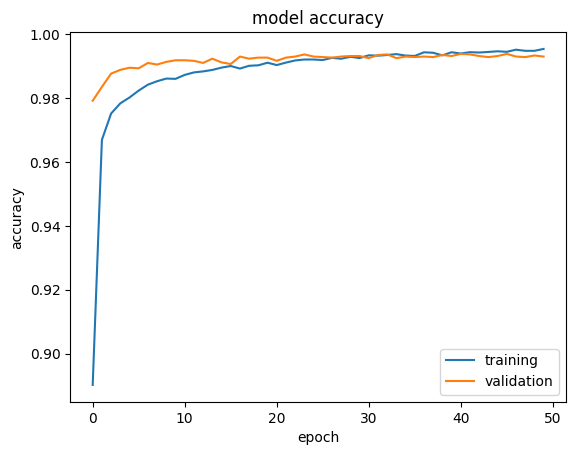

Test loss: 0.0254
Test accuracy: 0.993


In [37]:
from  matplotlib import pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='best')
plt.show()

print(f'Test loss: {loss:.3}')
print(f'Test accuracy: {accuracy:.3}')